In [43]:
import os
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
from statsmodels.stats.proportion import proportion_confint

In [44]:
EXPERIMENT_NAME = 'SRNet-BestModel_FromCover'

# Training trends

In [7]:
TRAINING_LOG = os.path.join(EXPERIMENT_NAME, 'training_log.csv')
TICK_SIZE = 17

df_training_log = pd.read_csv(TRAINING_LOG, sep=';')

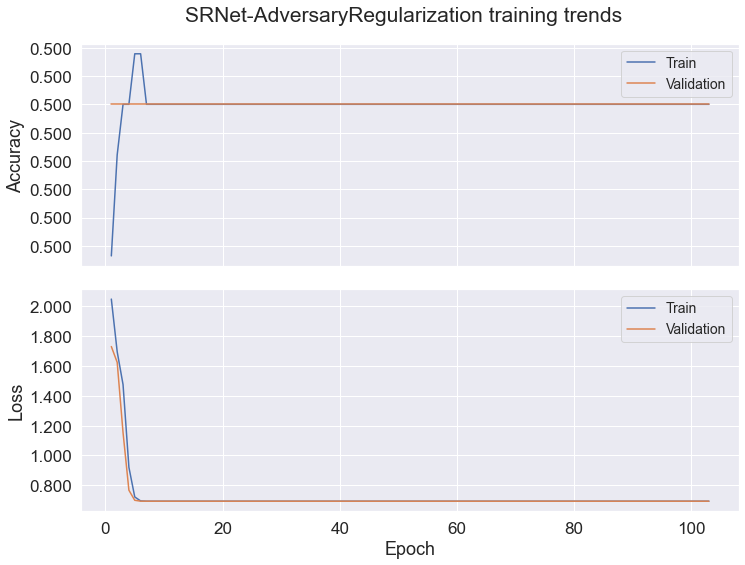

In [8]:
sns.set(style="darkgrid")

fig, axes = plt.subplots(2, 1, 
                       figsize=(10, 8),
                       sharex=True)

plt.xlabel('Epoch', fontdict={'fontsize':TICK_SIZE + 1})
plt.tick_params(axis='x', which='major', labelsize=TICK_SIZE)
fig.suptitle(EXPERIMENT_NAME + " training trends", fontsize=21)
plt.tight_layout()


ax = axes[0]

sns.lineplot(x=range(1, len(df_training_log) + 1), y=df_training_log['accuracy'], ax=ax, label="Train", palette="tab10")
sns.lineplot(x=range(1, len(df_training_log) + 1), y=df_training_log['val_accuracy'], ax=ax, label="Validation", palette="tab10")

# Add the legend
ax.legend(fontsize=14)

# Change axis labels
ax.set_ylabel('Accuracy', fontdict={'fontsize':TICK_SIZE + 1})

# Set the size of the y ticks
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['{:.3f}'.format(value) for value in ticks_loc], fontsize = TICK_SIZE)


ax = axes[1]

sns.lineplot(x=range(1, len(df_training_log) + 1), y=df_training_log['loss'], ax=ax, label="Train")
sns.lineplot(x=range(1, len(df_training_log) + 1), y=df_training_log['val_loss'], ax=ax, label="Validation")

# Add the legend
ax.legend(fontsize=14)

# Change axis labels
ax.set_ylabel('Loss', fontdict={'fontsize':TICK_SIZE + 1})

# Set the size of the y ticks
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['{:.3f}'.format(value) for value in ticks_loc], fontsize=TICK_SIZE)

plt.savefig(os.path.join(EXPERIMENT_NAME, EXPERIMENT_NAME + '_training_trend.pdf'), bbox_inches='tight')

# Confusion matrix

In [45]:
CLASSES = ['Cover', 'Stego']

CONFUSION_MATRIX = np.array([[4063, 937], 
                             [2955, 2045]])

ACCURACY = CONFUSION_MATRIX.diagonal().sum()/CONFUSION_MATRIX.sum()

In [46]:
def get_confidence_interval(success_rate, n, alpha):
    # Get the confidence interval of the prediction
    confidence_interval_tuple = proportion_confint(n*success_rate, n, method='wilson', alpha=alpha)
    
    # Reformat the tuple to have less decimal numbers
    return tuple([float("{0:.4f}".format(limit)) for limit in confidence_interval_tuple])

ALPHA = 0.05

CONFIDENCE_INTERVAL = get_confidence_interval(ACCURACY, CONFUSION_MATRIX.sum(), ALPHA)

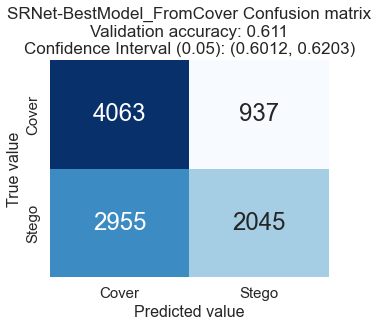

In [47]:
sns.set_style("darkgrid")
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

cm_sn = pd.DataFrame(CONFUSION_MATRIX, columns = CLASSES, index = CLASSES)

# Generate the confussion matrix
fig, ax = plt.subplots(figsize=(5, 4))
sns.set(font_scale=2)
sns.heatmap(cm_sn, annot=True, cmap='Blues', fmt='g', ax=ax, cbar=False)

# Labels, title and ticks
label_font = {'size':'16'}
ax.set_xlabel('Predicted value', fontdict=label_font)
ax.set_ylabel('True value', fontdict=label_font)

# Title
title_font = {'size':'17'}
ax.set_title(EXPERIMENT_NAME + ' Confusion matrix' + 
                 '\nValidation accuracy: {0:.3f}'.format(ACCURACY) + 
                 f'\nConfidence Interval ({ALPHA}): {str(CONFIDENCE_INTERVAL)}', 
             fontdict=title_font)

plt.savefig(os.path.join(EXPERIMENT_NAME, EXPERIMENT_NAME + '_confusion_matrix.pdf'), bbox_inches='tight')